# Startup financial planning

En reprenant toutes ces connaissances précédemment fait moi des prévisions financière et tire en des graphiques en utilisant des fonctionnalité d'analyse des données. L'objet est la création d'une startup dans la collecte de données immobilière et de leur analyse à base d'intelligence artificielle.

Notre masse salariale est constituée ainsi :

- 1 CTO (fondateur non payé Y+1)
- 1 CEO (fondateur non payé en Y+1)
- 1 architecte devops (fondateur non payé en Y+1)
- 1 développeur front end (fondateur non payé en Y+1)
- 1 nouveau data scientist en Y+1 (6200€ brut employeur / mois)
- 1 nouvel architecte / dev ops en Y+3 (4200€ brut employeur / mois)

Nous comptons ces abonnements : 

- lobstrio : service de scrapping : 1000€ par mois
- hebergement cloud azure : 120€ / mois
- hebergement google tpu : 60€/mois
- abonnement outil low code dhiWise 50€ /mois
- abonnement figma 20€/mois
- license google play store 25€
- license apple store 50 €

Et nous prévoyons comme revenu :
- Recherche avancée pour utilisateurs particuliers (potentiel de 100K€)
- Achat automatique via blockchain de propriétés pour clients institutionnels (potentiel de 1M€ de revenu en Y+2)


Tous cela est prevu notre première Période d'éxecution.  Il faudra prévoir dans les chiffres prévisions en conséquence :
- Une croissance de 100% par an
- un cout multiplié par 2 par Périodes en terme d'hébergement

In [881]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [882]:
stabilisation_dcrementor = 0.9
cycle_crisis_rate = 0.8
inflexion_time_period = 7
stabilisation_time_period = 12
economic_cycle_duration = round(((4 * 3) * 4) / 4)  # 4 year
periods_to_zero = range(1, 3)
reasonable_growth_rate = 1.2
growth_rate = 1.4
period = 3
startyear = 2023
years_to_handle = 5


def calculate_revenue(initial_revenues, growth_rate, years):
    # Initialize dictionary to hold the revenue data
    revenue_data = {}
    local_growth_rate = growth_rate

    for category, (initial_revenue, start_year) in initial_revenues.items():
        last_year_revenue = 0
        revenues = []

        for year in years:
            if year in periods_to_zero:
                revenues.append(0)
                continue
            if year >= start_year:
                if last_year_revenue == 0:
                    revenue = initial_revenue
                else:
                    # Prediction of bad economic situation every 4 years
                    curr_cycle_crisis_rate = (
                        cycle_crisis_rate if year % economic_cycle_duration == 0 else 1
                    )
                    revenue = last_year_revenue * (
                        local_growth_rate * curr_cycle_crisis_rate
                    )
                last_year_revenue = revenue

                revenues.append(revenue)
            else:
                revenues.append(0)

            if year >= inflexion_time_period and not local_growth_rate <= 0.9:
                local_growth_rate = local_growth_rate * stabilisation_dcrementor
            elif stabilisation_time_period >= year:
                local_growth_rate = growth_rate
            else:
                local_growth_rate = reasonable_growth_rate

        revenue_data[category] = revenues

    return revenue_data


# Test the function
initial_revenues = {
    "Recherche avancée (€)": (10000, 2),  # Y+1
    "Frais achat via blockchain (€)": (50000, 4),  # Y+2
    "Achat automatique selon critères (€)": (50000, 6),  # Y+3
}

semesters_nb = round((years_to_handle * 12) / period)

semesters = np.array(range(1, semesters_nb + 1))
semesters_label = []

_year = startyear
for s in semesters:
    semesters_label.append(f"{_year}-S{s % 4 if s % 4 != 0 else 4}")
    if s % 4 == 0:
        _year += 1

revenue_data = {
    **calculate_revenue(initial_revenues, growth_rate, semesters),
}

revenues = [sum(t) for t in zip(*revenue_data.values())]

print(revenues)

[0, 0, 10000, 64000.0, 89600.0, 175440.0, 245616.0, 309476.16000000003, 350945.96544000006, 358175.45232806413, 328998.4799814201, 217582.74993753625, 304615.8499125507, 383815.9708898139, 435247.310989049, 444213.4055954235, 408027.78157562035, 337310.8546396233, 404773.025567548, 437154.86761295184]


In [883]:
# Calculer les coûts de personnel
data_scientist_salary = 5200 * 3  # Y+1
dev_ops_salary = 3400 * 3 # Y+3
seo_expert_salary = 2800 * 3 # Y+3
founders_salary = (4000 * 4) * 3 # Y+4

marketing_budget = 4500 * 3

salary_increase = 1.02

# Calculer les coûts des abonnements
initial_subscriptions_cost = (1000 + 50 + 20 + 25 + 50) * 3
user_nb_related_cost =  (240 + 120) * 3

# Appliquer les taux de croissance
growth_rate = 1.03  # 100%
marketing_needed_rate = 0.95  # 100%
growth_rate_sub = 1.1  # 100%

# Initialisation des listes pour stocker les valeurs
salaries = []
subscriptions = []
marketing_costs = []
number_of_users = 1000 / 100
last_sub_cost = user_nb_related_cost + initial_subscriptions_cost

# Calculer les prévisions
for year in semesters:
    year_salaries = 0
    year_revenues = 0
    year_subscriptions = last_sub_cost

    # Salaires
    seo_expert_salary = seo_expert_salary * growth_rate
    year_salaries += seo_expert_salary
    if year >= 2:
        data_scientist_salary = data_scientist_salary * growth_rate
        year_salaries += data_scientist_salary
    if year >= 6:
        dev_ops_salary = dev_ops_salary * growth_rate
        year_salaries += dev_ops_salary

    if year >= 10:
        founders_salary = founders_salary * growth_rate
        year_salaries += founders_salary

    # Abonnements et hébergement (coût multiplié par 2 chaque année)
    year_subscriptions += user_nb_related_cost * (growth_rate_sub ** (year - 1))
    last_sub_cost = year_subscriptions

    # Appliquer le taux de croissance aux revenus et aux salaires
    year_salaries *= (growth_rate ** (year - 1))

    # Ajouter aux listes
    salaries.append(year_salaries)
    subscriptions.append(year_subscriptions)
    marketing_costs.append(marketing_budget * (marketing_needed_rate ** (year - 1)))


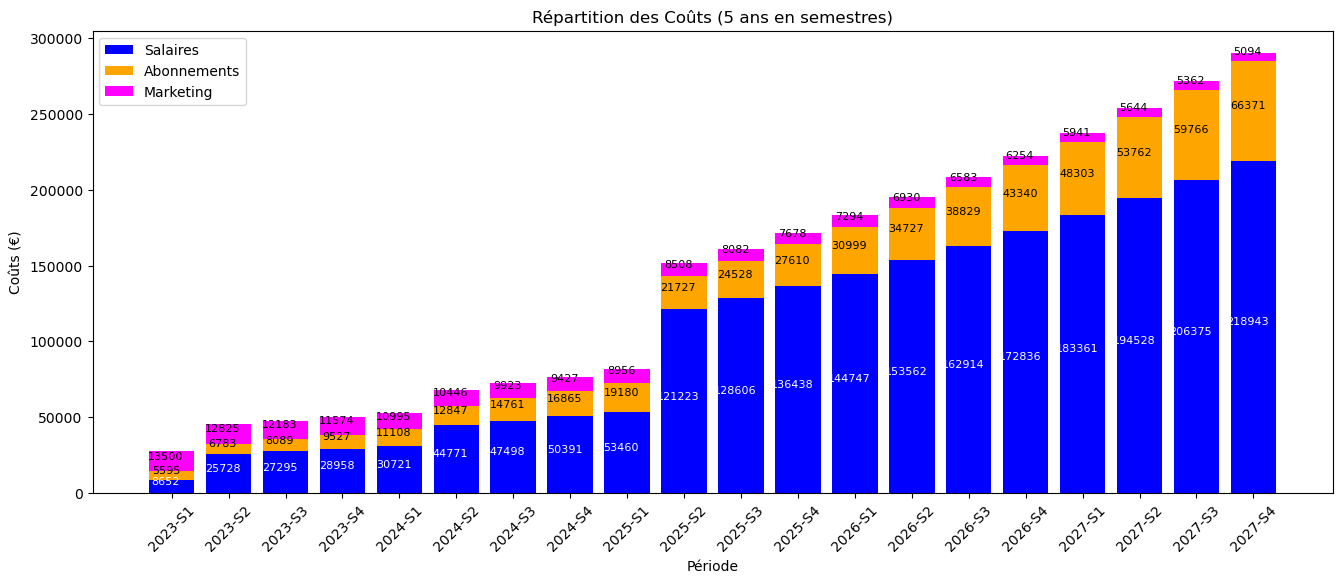

In [884]:
# Créer un DataFrame pour les coûts répartis
df_costs = pd.DataFrame({
    'Période': semesters,
    'Salaires (€)': salaries,
    'Abonnements (€)': subscriptions,
    'Marketing (€)': marketing_costs
})

# Tracer l'histogramme pour la répartition des coûts
plt.figure(figsize=(16, 6))

# Empilement des barres pour chaque Période
plt.bar(df_costs['Période'], df_costs['Salaires (€)'], label='Salaires', color='blue')
plt.bar(df_costs['Période'], df_costs['Abonnements (€)'], bottom=df_costs['Salaires (€)'], label='Abonnements', color='orange')
plt.bar(df_costs['Période'], df_costs['Marketing (€)'], bottom=df_costs['Salaires (€)'] + df_costs['Abonnements (€)'], label='Marketing', color='magenta')

# Ajouter les valeurs de chaque revenu sur les barres
for i, (salary, sub, marketing) in enumerate(
    zip(
        df_costs['Salaires (€)'],
        df_costs['Abonnements (€)'],
        df_costs['Marketing (€)'],
    )
):
    plt.text(
        i + 0.9,
        salary / 2,
        str(int(salary)),
        ha="center",
        va="bottom",
        color="white",
                fontdict={'size': 8}
    )
    plt.text(
        i + 0.9,
        salary + sub / 2,
        str(int(sub)),
        ha="center",
        va="bottom",
        color="black",
        fontdict={'size': 8}
    )
    plt.text(
        i + 0.9,
        salary + sub + marketing / 2,
        str(int(marketing)),
        ha="center",
        va="bottom",
        color="black",
        fontdict={'size': 8}
    )

# Ajout des étiquettes et du titre
plt.xlabel('Période')
plt.ylabel('Coûts (€)')
plt.xticks(semesters, semesters_label, rotation=45)
plt.title(f'Répartition des Coûts ({years_to_handle} ans en semestres)')
plt.legend()

# Afficher le graphique
plt.show()


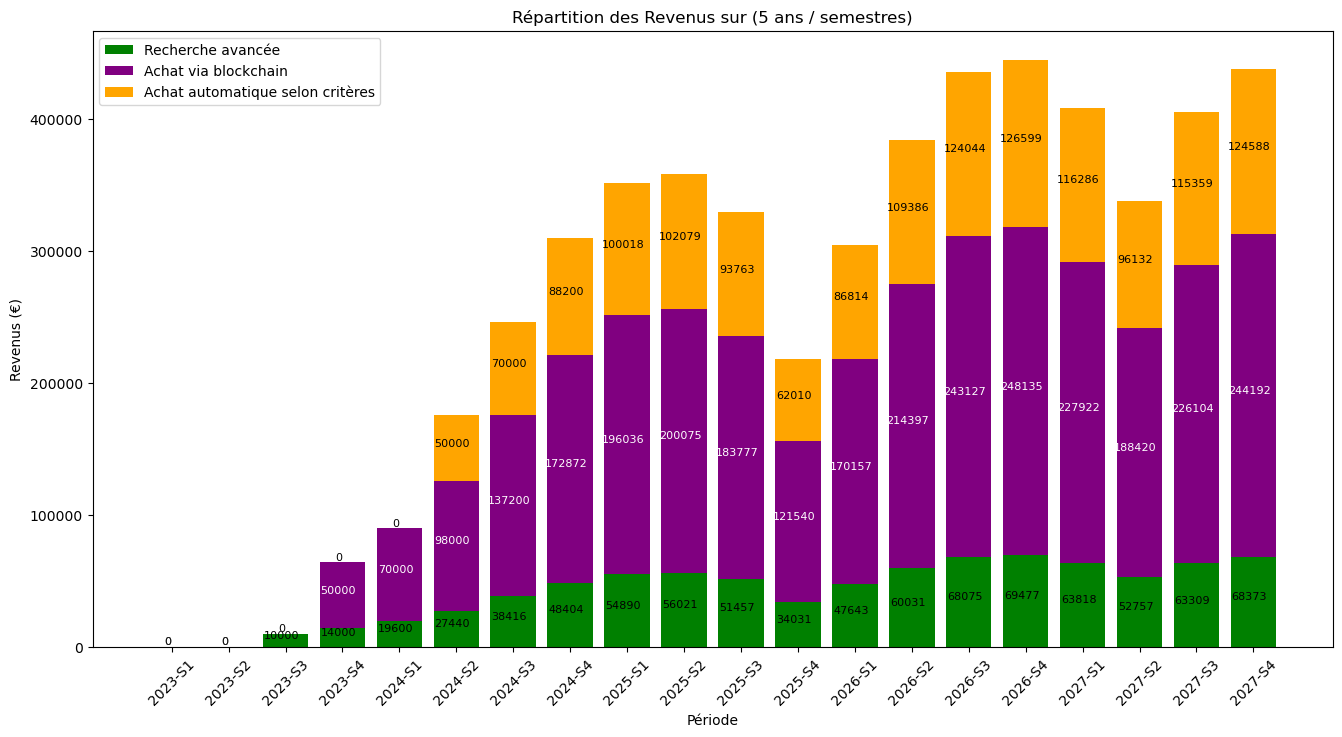

In [885]:
# Créer un DataFrame pour les revenus répartis
df_revenue = pd.DataFrame({"Période": semesters, **revenue_data})

# Tracer l'histogramme pour la répartition des revenus
plt.figure(figsize=(16, 8))

# Empilement des barres pour chaque Période
plt.bar(
    df_revenue["Période"],
    df_revenue["Recherche avancée (€)"],
    label="Recherche avancée",
    color="green",
)
plt.bar(
    df_revenue["Période"],
    df_revenue["Frais achat via blockchain (€)"],
    bottom=df_revenue["Recherche avancée (€)"],
    label="Achat via blockchain",
    color="purple",
)
plt.bar(
    df_revenue["Période"],
    df_revenue["Achat automatique selon critères (€)"],
    bottom=df_revenue["Recherche avancée (€)"]
    + df_revenue["Frais achat via blockchain (€)"],
    label="Achat automatique selon critères",
    color="orange",
)

# Ajout des étiquettes et du titre
plt.xlabel("Période")
plt.xticks(semesters, semesters_label, rotation=45)
plt.ylabel("Revenus (€)")
plt.title(f"Répartition des Revenus sur ({years_to_handle} ans / semestres)")

# Ajouter les valeurs de chaque revenu sur les barres
for i, (rev_advanced, rev_blockchain, rev_auto_buy) in enumerate(
    zip(
        df_revenue["Recherche avancée (€)"],
        df_revenue["Frais achat via blockchain (€)"],
        df_revenue["Achat automatique selon critères (€)"],
    )
):
    plt.text(
        i + 0.93,
        rev_advanced / 2,
        str(int(rev_advanced)),
        ha="center",
        va="bottom",
        color="black",
        fontdict={"size": 8},
    )
    plt.text(
        i + 0.93,
        rev_advanced + rev_blockchain / 2,
        str(int(rev_blockchain)),
        ha="center",
        va="bottom",
        color="white",
        fontdict={'size': 8}
    )

    plt.text(
        i + 0.93,
        rev_advanced + rev_blockchain + rev_auto_buy / 2,
        str(int(rev_auto_buy)),
        ha="center",
        va="bottom",
        color="black",
        fontdict={'size': 8}
    )

plt.legend()

# Afficher le graphique
plt.show()

    Période   Salaires (€)  Abonnements (€)    Revenus (€)  Marketing (€)  \
0         1    8652.000000      5595.000000       0.000000    5094.273634   
1         2   25728.946800      6783.000000       0.000000    5094.273634   
2         3   27295.839660      8089.800000   10000.000000    5094.273634   
3         4   28958.156295      9527.280000   64000.000000    5094.273634   
4         5   30721.708014     11108.508000   89600.000000    5094.273634   
5         6   44771.993456     12847.858800  175440.000000    5094.273634   
6         7   47498.607858     14761.144680  245616.000000    5094.273634   
7         8   50391.273076     16865.759148  309476.160000    5094.273634   
8         9   53460.101607     19180.835063  350945.965440    5094.273634   
9        10  121223.808003     21727.418569  358175.452328    5094.273634   
10       11  128606.337911     24528.660426  328998.479981    5094.273634   
11       12  136438.463889     27610.026469  217582.749938    5094.273634   

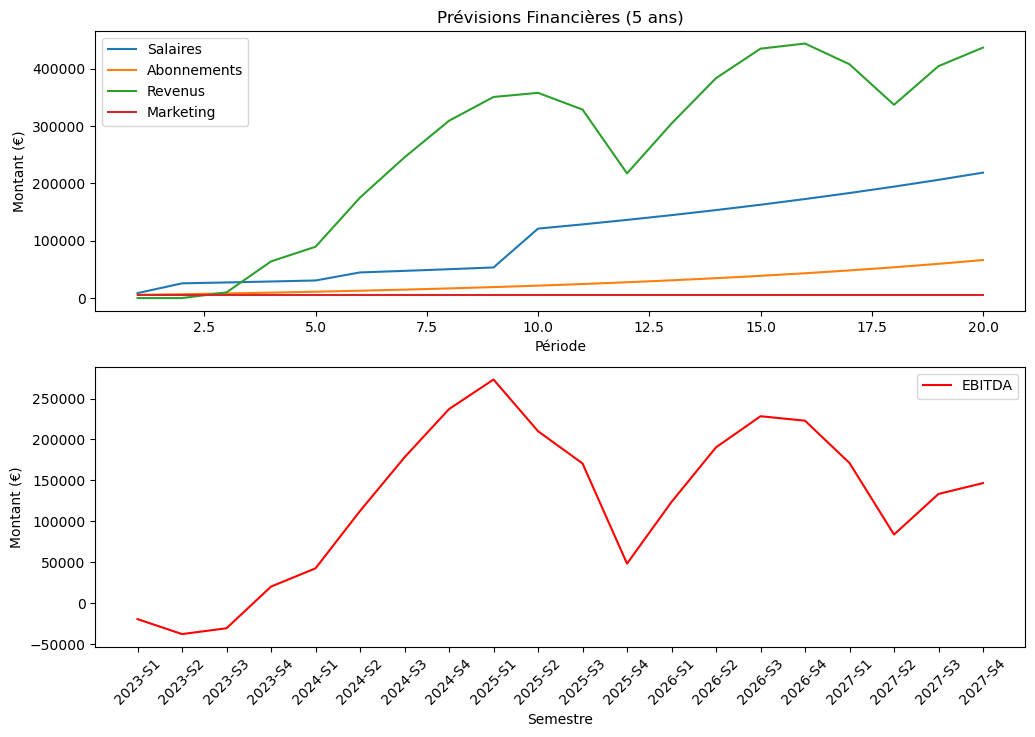

In [886]:
df = pd.DataFrame({
    'Période': semesters,
    'Salaires (€)': salaries,
    'Abonnements (€)': subscriptions,
    'Revenus (€)': revenues,
    'Marketing (€)': marketing
})

# Calculer l'EBITDA
df['EBITDA (€)'] = df['Revenus (€)'] - (df['Salaires (€)'] + df['Abonnements (€)'] + df['Marketing (€)'])

# Afficher le DataFrame
print(df)

# Tracer les graphiques
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(df['Période'], df['Salaires (€)'], label='Salaires')
plt.plot(df['Période'], df['Abonnements (€)'], label='Abonnements')
plt.plot(df['Période'], df['Revenus (€)'], label='Revenus')
plt.plot(df['Période'], df['Marketing (€)'], label='Marketing')
plt.title(f'Prévisions Financières ({years_to_handle} ans)')
plt.xlabel('Période')
plt.ylabel('Montant (€)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df['Période'], df['EBITDA (€)'], label='EBITDA', color='r')
plt.xlabel('Semestre')
plt.ylabel('Montant (€)')
plt.xticks(semesters, semesters_label, rotation=45)
plt.legend()